<a href="https://colab.research.google.com/github/suniljaggi16fsm/DeepLearning/blob/main/Project2_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROJECT 1: Customer Churn Prediction

Submitted To: Prof. Ashok Harnal

Submitted By: Group 9
1. Anjanay - 035008
2. Dhruvankit - 035021
3. Sunil Kumar Jaggi - 035056


# **Project Overview:**

Churn prediction means detecting which customers are likely to cancel a subscription to a service based on how they use the service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones. Once you can identify those customers that are at risk of cancelling, you should know exactly what marketing action to take for each individual customer to maximise the chances that the customer will remain. Different customers exhibit different behaviours and preferences, so they cancel their subscriptions for various reasons. It is critical, therefore, to proactively communicate with each of them in order to retain them in your customer list. You need to know which marketing action will be the most effective for each and every customer, and when it will be most effective.

# **Challenges**
Churn prediction modelling techniques attempt to understand the precise customer behaviours and attributes that signal the risk and timing of customers leaving. It’s not a walk-in-the-park task so I mention just four points to consider.

To succeed at retaining customers who are ready to abandon your business, Marketers & Customer Success experts must be able to predict in advance which customers are going to churn and set up a plan of marketing actions that will have the greatest retention impact on each customer. The key here is to to be proactive and engage with these customers. While simple in theory, the realities involved with achieving this “proactive retention” goal are extremely challenging.
The accuracy of the technique is critical to the success of any proactive retention efforts. If the Marketer is unaware of a customer about to churn, no action will be taken to retain that customer
Special retention-focused offers or incentives may be provided to happy, active customers, resulting in reduced revenues for no good reason.
Your churn prediction model should rely on (almost) real-time data to quantify the risk of churning, not on static data. Although you will be able to identify a certain percentage of at-risk customers with even static data, your predictions will be inaccurate.

# Objectives:
1. To perform data cleaning and preprocessing.
2. To perform Exploratory data analysis.
3. To perform Time-series forcasting using normalized feature
4. To perform regression using Random Forest Regressor and Gradient Boosting Regressor
5. To implement Multi Neural network on Google Play Apps.
6. To implement multi network neural network with dropout.
7. To implement Multilayer NN using dropout and normalization.
8. To implement and explore fastasi features for tabular data.
9. To implement neural netoworks using auto-encoders.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from scipy.stats import skew

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import scikitplot as skplt

import optuna

import tensorflow as tf

In [ ]:
#pip install catboost
#pip install optuna
#!pip install scikit-plot


## **Loading Data**

In [ ]:
# 1.1 Mount Google Drive for data access
from pathlib import Path

from google.colab import drive
drive.mount('/gdrive')

pathToFolder = "/gdrive/MyDrive"
path = Path(pathToFolder) / "Telco.csv"
data = pd.read_csv(path)


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


## **Data Preprocessing**

Starting off by dropping the customerID column as it will of no use in our analysis

In [ ]:
data.drop('customerID', axis=1, inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


`SeniorCitizen` column has an integer datatype and it is clearly a categorical variable, also the `TotalCharges` column has an object datatype and is a numerical feature, so I will convert them to correct datatypes.

In [ ]:
print(data['SeniorCitizen'].unique())
print(data['TotalCharges'].nunique())

[0 1]
6531


In [ ]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)

In [ ]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', np.NaN) # This column had missing values represented by ' '. I noticed it when I tried converting it to float and it gave me an error that it could not convert string to float
data['TotalCharges'] = data['TotalCharges'].astype(float)
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median()) # I will fill the missing values with median

In [ ]:
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No phone service', 'No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes', 'No internet service']
OnlineBackup : ['Yes', 'No', 'No internet service']
DeviceProtection : ['No', 'Yes', 'No internet service']
TechSupport : ['No', 'Yes', 'No internet service']
StreamingTV : ['No', 'Yes', 'No internet service']
StreamingMovies : ['No', 'Yes', 'No internet service']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


There are several features in our dataset like Online Security which has both `No` and `No internet sercvice` as a value. As this both values are essentially the same thing, I will convert it to one

In [ ]:
data['MultipleLines'] = data['MultipleLines'].replace('No phone service', 'No')
data[['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
      'TechSupport', 'StreamingTV', 'StreamingMovies']] = data[['OnlineSecurity', 'OnlineBackup',
                                                                'DeviceProtection', 'TechSupport',
                                                                'StreamingTV', 'StreamingMovies']].replace('No internet service', 'No')

In [ ]:
unique_values = {column: list(data[column].unique()) for column in data.select_dtypes(object).columns}
for key, value in unique_values.items():
    print(f'{key} : {value}')

gender : ['Female', 'Male']
SeniorCitizen : ['0', '1']
Partner : ['Yes', 'No']
Dependents : ['No', 'Yes']
PhoneService : ['No', 'Yes']
MultipleLines : ['No', 'Yes']
InternetService : ['DSL', 'Fiber optic', 'No']
OnlineSecurity : ['No', 'Yes']
OnlineBackup : ['Yes', 'No']
DeviceProtection : ['No', 'Yes']
TechSupport : ['No', 'Yes']
StreamingTV : ['No', 'Yes']
StreamingMovies : ['No', 'Yes']
Contract : ['Month-to-month', 'One year', 'Two year']
PaperlessBilling : ['Yes', 'No']
PaymentMethod : ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn : ['No', 'Yes']


In [ ]:
data['tenure'].value_counts(ascending= False)
# 0 appears 11 times, and minimum contract possible is a month-to-month contract, so I will count it as missing value and will fill it with median

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

In [ ]:
data['tenure']  = data['tenure'].replace(0, np.NaN)
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

## **EDA**

In [ ]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

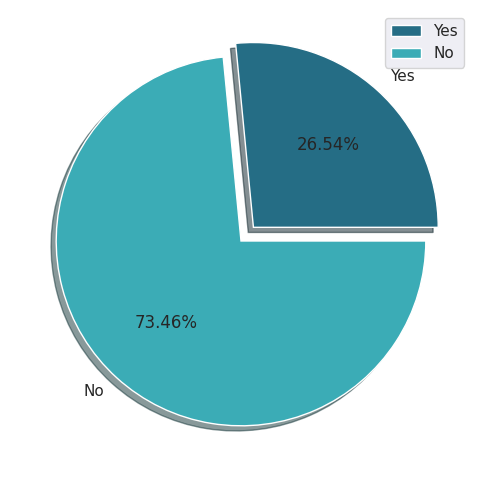

In [ ]:
plt.figure(figsize= (10, 6))
data_pie  = [1869 , 5174]
labels = ["Yes", "No"]
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

We clearly have a imbalanced dataset. Out of all the customers, `73.46%` of people won't churn. We will have to take that into account while splitting the dataset

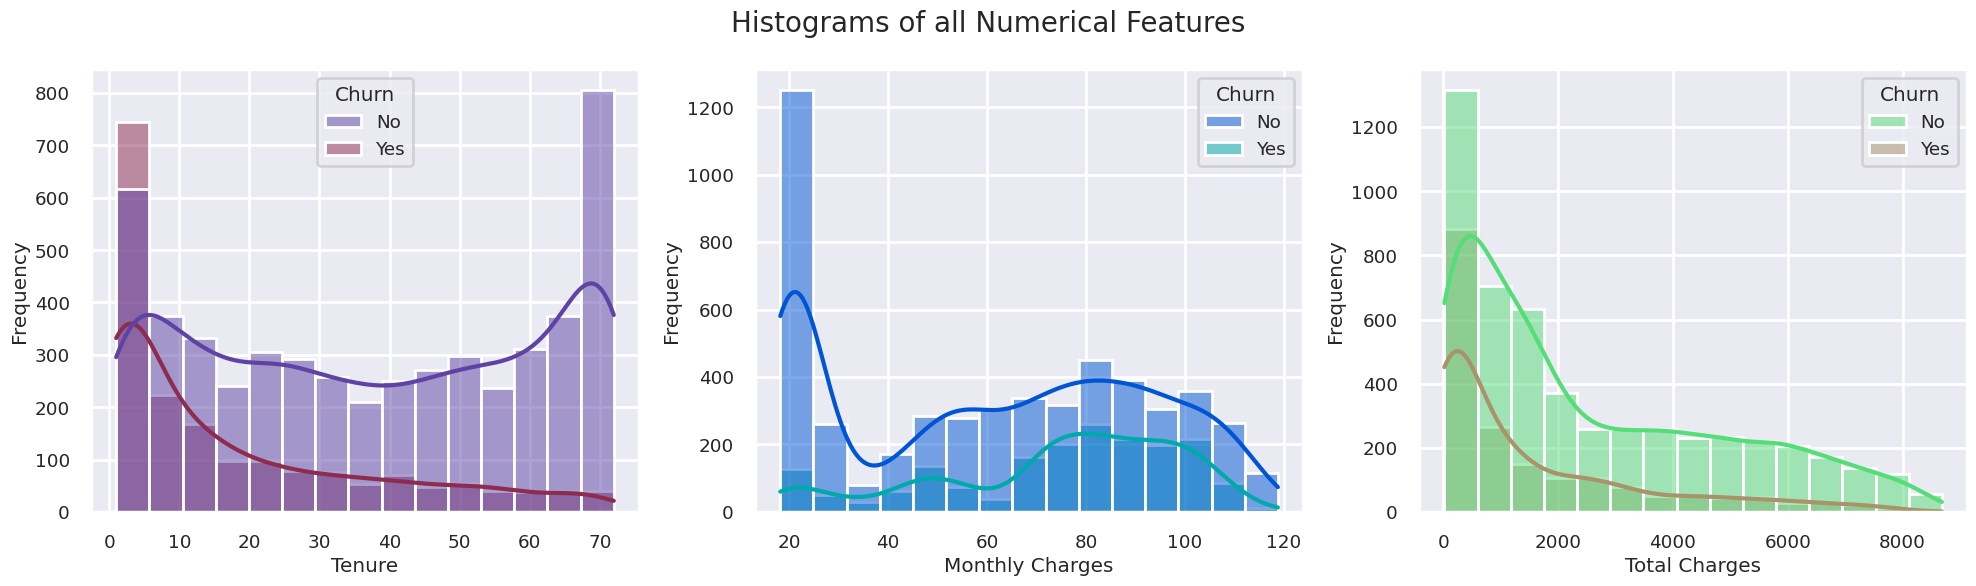

In [ ]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.histplot(x = data['tenure'],color= 'teal', hue= data['Churn'], ax= ax[0], bins= 15, kde= True, palette= 'twilight')
ax1.set(xlabel= 'Tenure', ylabel= 'Frequency')

ax2 = sns.histplot(x = data['MonthlyCharges'], color= 'teal', hue= data['Churn'], ax= ax[1], bins= 15, kde= True, palette= 'winter')
ax2.set(xlabel= 'Monthly Charges', ylabel= 'Frequency')

ax3 = sns.histplot(x = data['TotalCharges'], color= 'teal', hue= data['Churn'], ax= ax[2], bins= 15, kde= True, palette= 'terrain')
ax3.set(xlabel= 'Total Charges', ylabel= 'Frequency')

plt.tight_layout()
plt.show()

The more months the customer stays with the company, the less likely it is that he/she will churn. Also, the total charges column is clearly skewed, I will apply log transformation later.

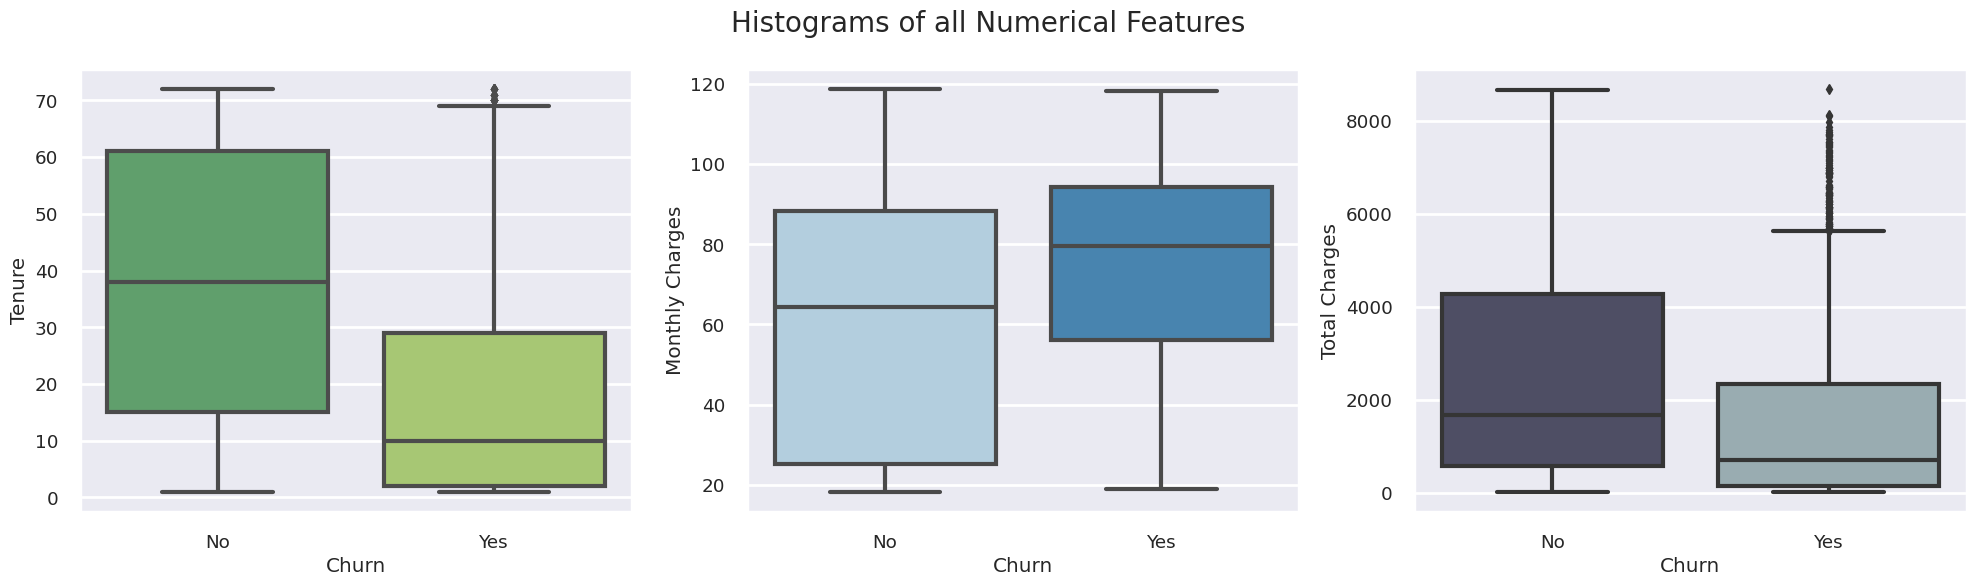

In [ ]:
sns.set_context('poster', font_scale= 0.6)
fig, ax  = plt.subplots(1, 3, figsize=(20, 6))

plt.suptitle('Histograms of all Numerical Features', fontsize = 20)

ax1 = sns.boxplot(y = data['tenure'], x= data['Churn'], ax= ax[0], palette= 'summer')
ax1.set(xlabel= 'Churn', ylabel= 'Tenure')

ax2 = sns.boxplot(y = data['MonthlyCharges'], x= data['Churn'], ax= ax[1], palette= 'Blues')
ax2.set(xlabel= 'Churn', ylabel= 'Monthly Charges')

ax3 = sns.boxplot(y = data['TotalCharges'], x= data['Churn'], ax= ax[2], palette= 'bone')
ax3.set(xlabel= 'Churn', ylabel= 'Total Charges')

plt.tight_layout()
plt.show()

<ipython-input-28-c8bcf34afb2f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True)


<Axes: >

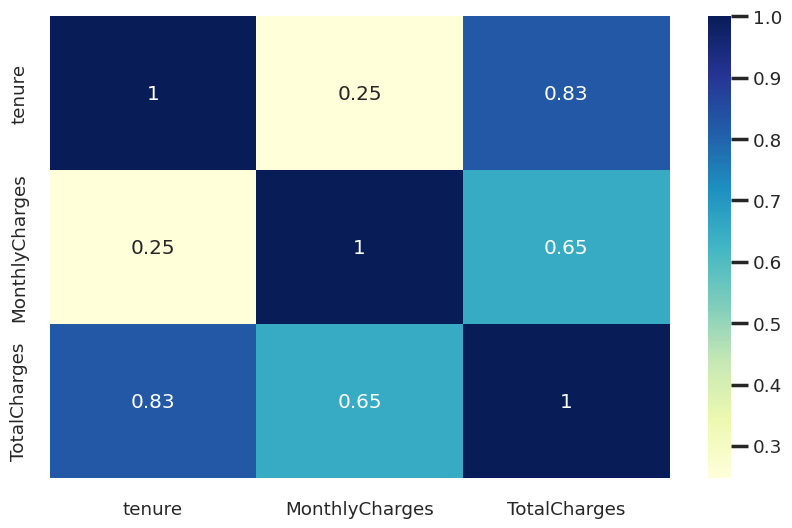

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), cmap = 'YlGnBu', annot = True)

There is definitely some correlation between tenure and total charges

Let us also check out the how our categorical variables change based on our target variable

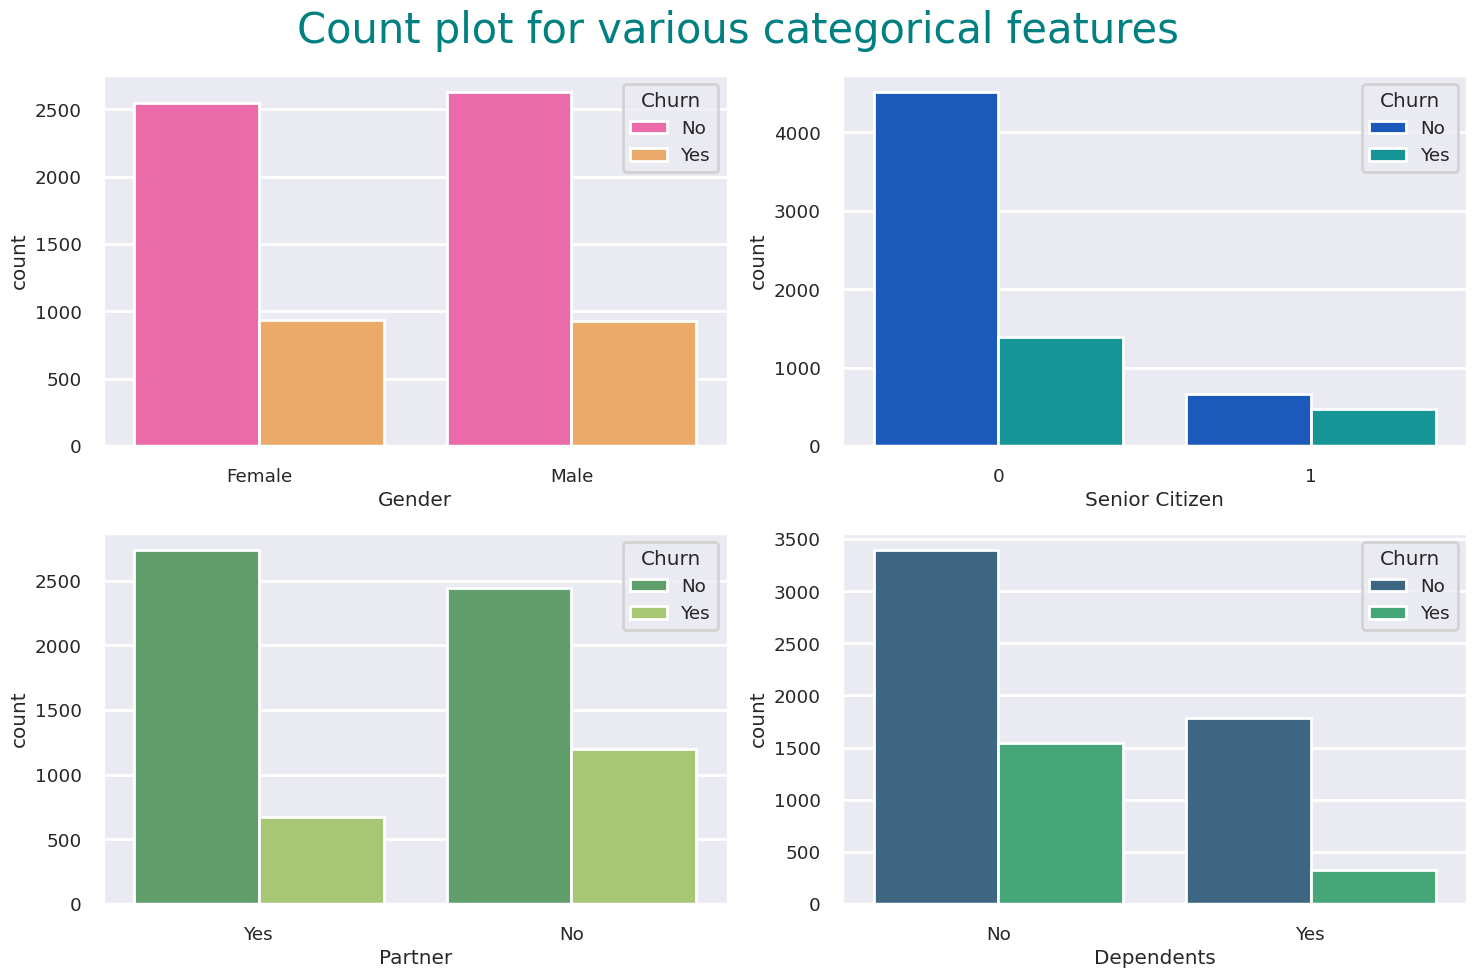

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 10))
plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='gender', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Gender')

ax2 = sns.countplot(x ='SeniorCitizen', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Senior Citizen')

ax3 = sns.countplot(x ='Partner', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Partner')

ax4 = sns.countplot(x ='Dependents', data= data, hue= 'Churn', ax= ax[1, 1], palette= 'viridis')
ax4.set(xlabel = 'Dependents')

plt.tight_layout()
plt.show()

Based on the `demographic information`, it is clear that Senior Citizens are much more likely to churn, also, customers not having a partner have higher chances of churning as compared to customers who do have a partner.

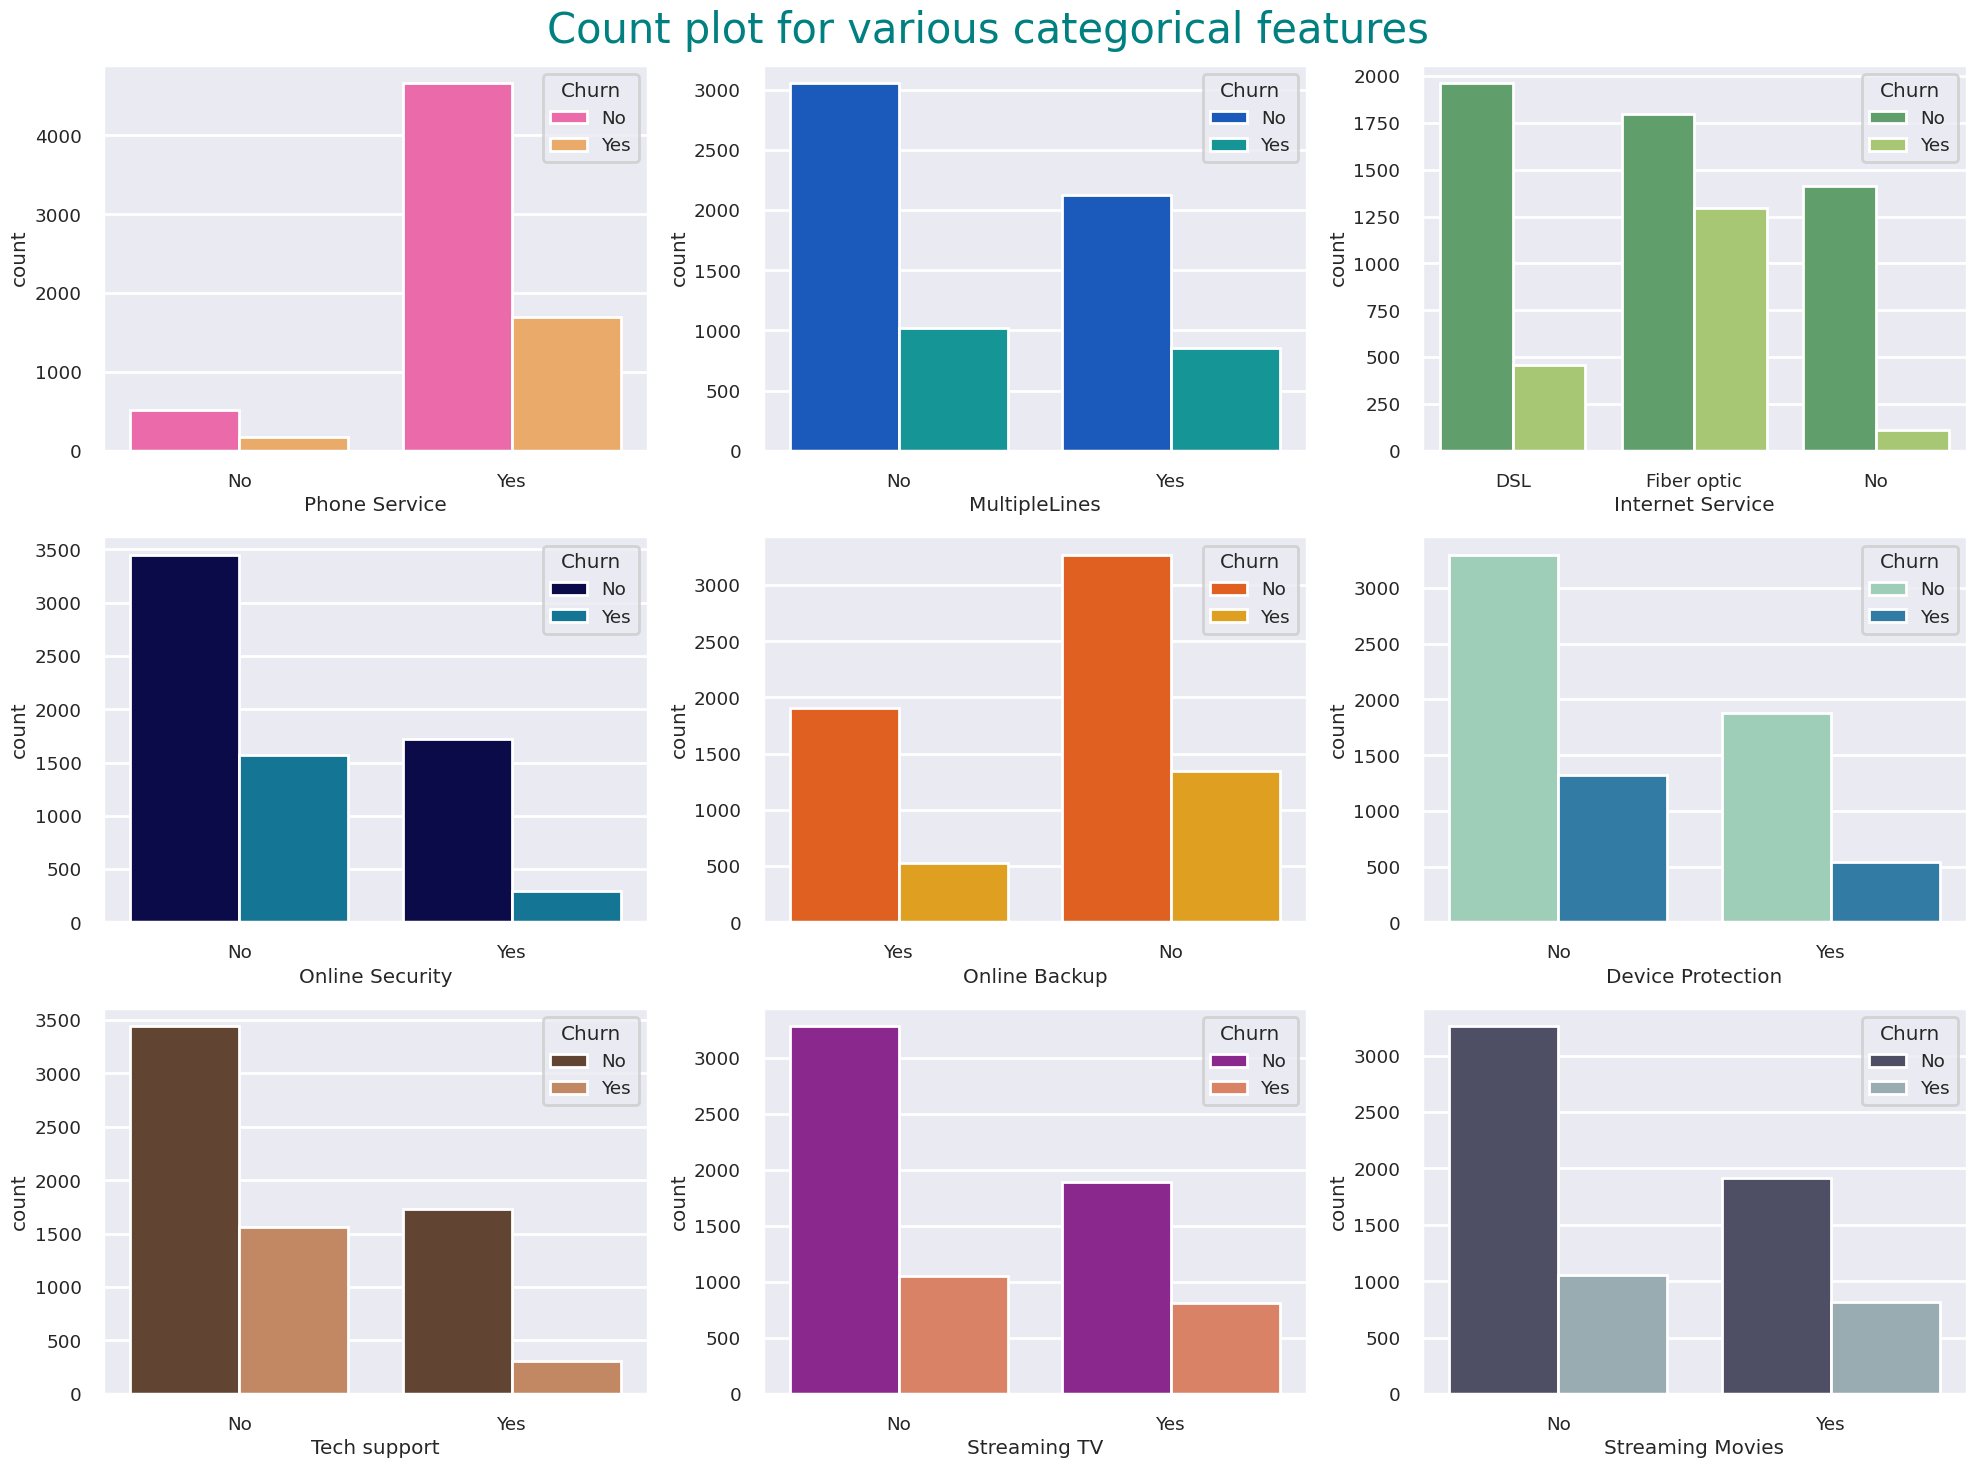

In [ ]:
fig, ax = plt.subplots(3, 3, figsize = (20, 15))

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='PhoneService', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Phone Service')

ax2 = sns.countplot(x ='MultipleLines', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'MultipleLines')

ax3 = sns.countplot(x ='InternetService', data= data, hue= 'Churn', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Internet Service')

ax4 = sns.countplot(x ='OnlineSecurity', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'ocean')
ax4.set(xlabel = 'Online Security')

ax5 = sns.countplot(x ='OnlineBackup', data= data, hue= 'Churn', ax= ax[1, 1], palette= 'autumn')
ax5.set(xlabel = 'Online Backup')

ax6 = sns.countplot(x ='DeviceProtection', data= data, hue= 'Churn', ax= ax[1, 2], palette= 'YlGnBu')
ax6.set(xlabel = 'Device Protection')

ax7 = sns.countplot(x ='TechSupport', data= data, hue= 'Churn', ax= ax[2, 0], palette= 'copper')
ax7.set(xlabel = 'Tech support')

ax8 = sns.countplot(x ='StreamingTV', data= data, hue= 'Churn', ax= ax[2, 1], palette= 'plasma')
ax8.set(xlabel = 'Streaming TV')

ax9 = sns.countplot(x ='StreamingMovies', data= data, hue= 'Churn', ax= ax[2, 2], palette= 'bone')
ax9.set(xlabel = 'Streaming Movies')

plt.tight_layout()
plt.show()

**Inference** : Customers having Fiber optic internet service are much more likely to churn then customers who don't

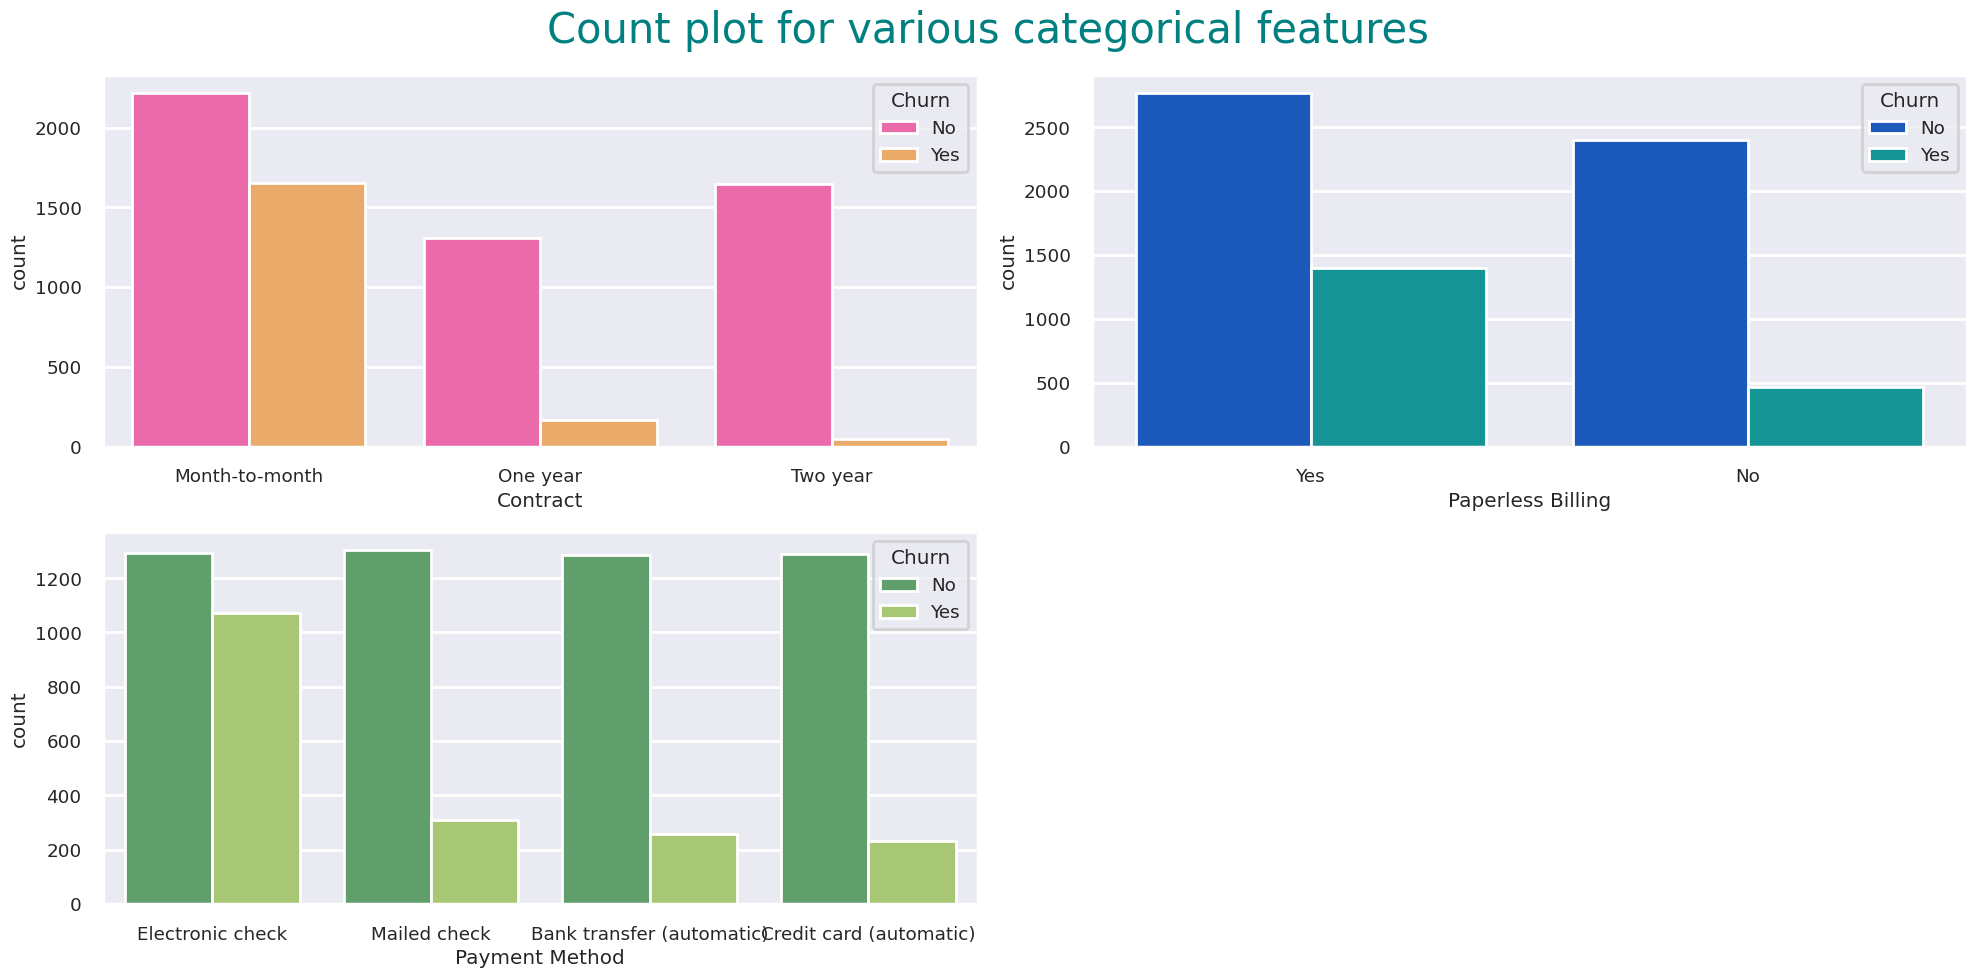

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 10))
ax[1, 1].axis('off')

plt.suptitle('Count plot for various categorical features', fontsize = 30, color= 'teal')

ax1 = sns.countplot(x ='Contract', data= data, hue= 'Churn', ax= ax[0, 0], palette= 'spring')
ax1.set(xlabel = 'Contract')

ax2 = sns.countplot(x ='PaperlessBilling', data= data, hue= 'Churn', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Paperless Billing')

ax3 = sns.countplot(x ='PaymentMethod', data= data, hue= 'Churn', ax= ax[1, 0], palette= 'summer')
ax3.set(xlabel = 'Payment Method')

plt.tight_layout()
plt.show()

Based on the `Account` information, customers having longer contracts are much more less likely to churn. Also, customers who use Electronic Check as a payment method have higher chances of churning then customers who use other methods

## **Missing Values**

In [ ]:
data.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Luckily, there are no missing values in this dataset

## **Checking For Skewness**

In [ ]:
skew_df = pd.DataFrame(data.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda feature: skew(data[feature]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df

,Feature,Skew,Absolute Skew
0,tenure,0.238505,0.238505
1,MonthlyCharges,-0.220477,0.220477
2,TotalCharges,0.963584,0.963584


Total Charges column is clearly skewed as we also saw in the histogram, so lets apply log transformation to it

In [ ]:
data['TotalCharges'] = np.log(data['TotalCharges'])

## **Encoding**

In this dataset, we have lots of categorical columns and some follow a certain order. So we will need to apply different kinds of encoding to different categorical features

Binary Encoding

In [ ]:
binary_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                   'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for column in binary_columns:
    data[column] = le.fit_transform(data[column])

One Hot Encoding

In [ ]:
dummies_payment = pd.get_dummies(data['PaymentMethod'], drop_first= True)
data = pd.concat([data, dummies_payment], axis=1)
data.drop('PaymentMethod',axis =1 , inplace= True)

Ordinal Encoding

In [ ]:
internet_ordering = ['No', 'DSL', 'Fiber optic']
contract_ordering = ['Month-to-month', 'One year', 'Two year']

data['InternetService'] = data['InternetService'].apply(lambda x: internet_ordering.index(x))
data['Contract'] = data['Contract'].apply(lambda x: contract_ordering.index(x))

## **Scaling**

In [ ]:
X = data.drop('Churn', axis= 1)
y = data['Churn']

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

## **Splitting**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 42)

In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

0    4139
1    1495
Name: Churn, dtype: int64
0    1035
1     374
Name: Churn, dtype: int64


## **Modelling**

In [ ]:
models = {
    'logistic regression' : LogisticRegression(),
    'xgboost' : XGBClassifier(),
    'catboost' : CatBoostClassifier(verbose=0),
    'lightbgm' : LGBMClassifier(),
    'gradient boosing' : GradientBoostingClassifier(),
    'naive bayes' : GaussianNB(),
    'random forest' : RandomForestClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f'{name} trained')

logistic regression trained
xgboost trained
catboost trained
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001343 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328
lightbgm trained
gradient boosing trained
naive bayes trained
random forest trained


## **Evaluation**

In [ ]:
results = {}

kf = KFold(n_splits= 10)

for name, model in models.items():
    result = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)
    results[name] = result

[LightGBM] [Info] Number of positive: 1348, number of negative: 3722
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265878 -> initscore=-1.015639
[LightGBM] [Info] Start training from score -1.015639
[LightGBM] [Info] Number of positive: 1351, number of negative: 3719
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 5070, number of used features: 21
[LightGBM] [Info] [b

In [ ]:
for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

----------------
logistic regression : 0.8508865553194583
----------------
xgboost : 0.8266057205150293
----------------
catboost : 0.8410796939951648
----------------
lightbgm : 0.8360262959501084
----------------
gradient boosing : 0.8451332375510457
----------------
naive bayes : 0.8338557401940768
----------------
random forest : 0.8244848739103523


Logistic regression seems to be the winner here. Let us perform some hyperparameter optimization and also check its accuracy on the test set

## **Hyperparameter Optimization**

In [ ]:
def lr_objective(trial):
    tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
    C = trial.suggest_float('C', 0, 0.1)
    max_iter = trial.suggest_int('max_iter', 50, 600)
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])

    model = LogisticRegression(
        solver= 'liblinear',
        penalty = penalty,
        tol= tol,
        C= C,
        max_iter= max_iter
    )

    model.fit(X_train, y_train)
    cv_score = cross_val_score(model, X_train, y_train, scoring= 'roc_auc', cv= kf)

    return np.mean(cv_score)

study = optuna.create_study(direction= 'maximize')
study.optimize(lr_objective, n_trials= 100)

[I 2023-08-21 16:31:09,687] A new study created in memory with name: no-name-dbb105dd-ad3e-465c-a3ca-7945504acda0
<ipython-input-46-df72d73ccb67>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
[I 2023-08-21 16:31:09,937] Trial 0 finished with value: 0.8506320077995874 and parameters: {'tol': 0.010033566616286257, 'C': 0.031733263559741445, 'max_iter': 147, 'penalty': 'l2'}. Best is trial 0 with value: 0.8506320077995874.
<ipython-input-46-df72d73ccb67>:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform('tol', 1e-7, 0.1)
[I 2023-08-21 16:31:10,347] Trial 1 finished with value: 0.8493801505978

In [ ]:
study.best_params

{'tol': 2.639243847186124e-06,
 'C': 0.09618802433126547,
 'max_iter': 294,
 'penalty': 'l1'}

In [ ]:
lr = LogisticRegression(
    solver = 'liblinear',
    tol = 0.008408625396645686,
    C = 0.08440490508701622,
    max_iter = 434,
    penalty = 'l1')

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_prob = lr.predict_proba(X_test)[:, 1]

In [ ]:
print("Actual values    :", y_test.values[:20])
print("Predicted values :", y_pred[:20])

Actual values    : [0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
Predicted values : [0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0]


In [ ]:
predictions = pd.DataFrame({'Probability of Customer Churning': y_pred_prob, 'Probability of customer not churning' : 1 - y_pred_prob})
predictions.head()

,Probability of Customer Churning,Probability of customer not churning
0,0.059625,0.940375
1,0.682840,0.317160
2,0.064255,0.935745
3,0.321076,0.678924
4,0.033475,0.966525


In [ ]:
print('ROC AUC Score:', round(roc_auc_score(y_test, y_pred_prob), 3))

ROC AUC Score: 0.849


We have a ROC score of 0.85 which is similar to what we got earlier

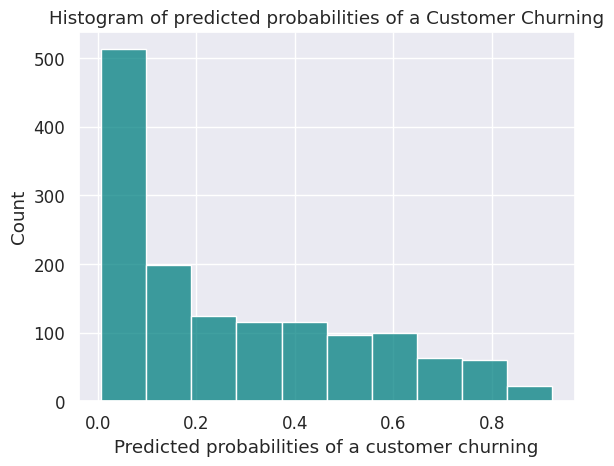

In [ ]:
sns.set_context('notebook', font_scale= 1.1)
sns.histplot(y_pred_prob, bins= 10, color= 'teal')
plt.title('Histogram of predicted probabilities of a Customer Churning')
plt.xlabel('Predicted probabilities of a customer churning')
plt.show()

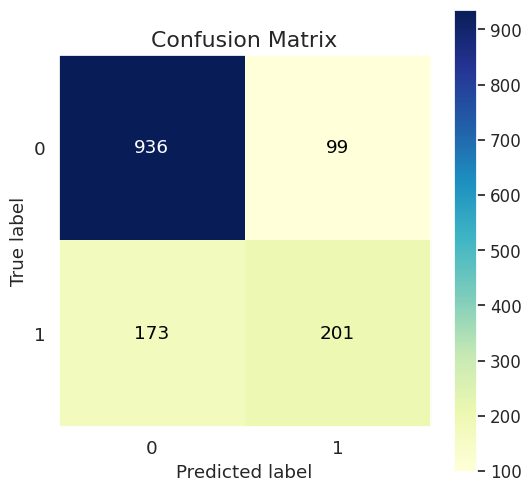

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(6,6), cmap= 'YlGnBu');

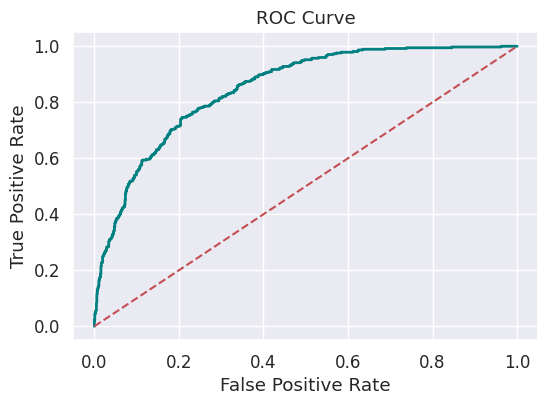

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2, color= 'teal')
plt.plot([0,1], [0,1], 'r--' )
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

## **ANN**

In [ ]:
X_train.shape

(5634, 21)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.Input(21),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights= True
)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC(name='auc')]
)


BATCH_SIZE = 100
EPOCHS = 10

history = model.fit(
    X_train,
    y_train,
    validation_split=0.20,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    verbose=0,
    callbacks = early_stopping
)

In [ ]:
history.history.keys()

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])

## **Plotting Results**

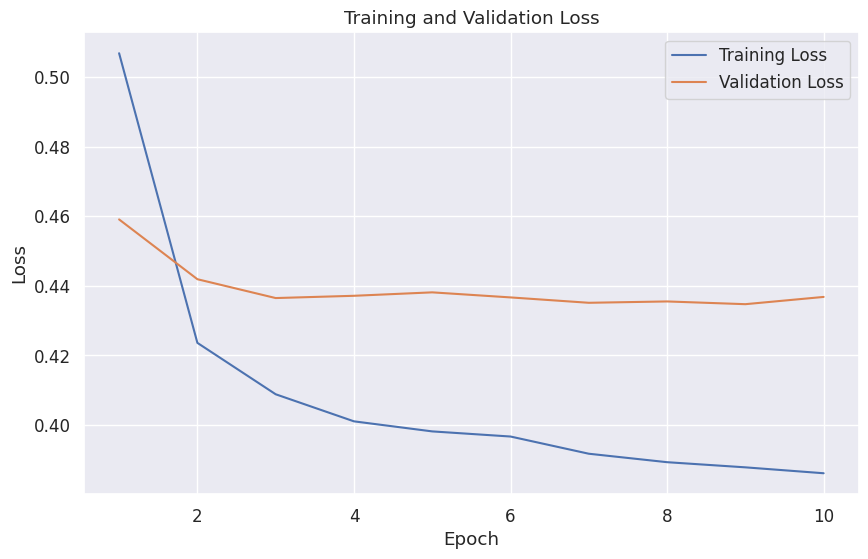

In [ ]:
plt.figure(figsize=(10, 6))

epochs = range(1, EPOCHS + 1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, train_loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [ ]:
np.argmin(val_loss)

8

Validation loss isn't changing that much after 6th epoch and our model has probably started overfitting after that

In [ ]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 2ms/step - loss: 0.4207 - auc: 0.8412


[0.4207485616207123, 0.8412320017814636]

We have an auc of 0.84 which is definitely not that bad, so our neural network seems to be doing a good job

In [ ]:
from fastai.tabular.all import *
import pandas as pd

# Define categorical and continuous column names
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']
cont_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Define procs (preprocessing steps)
procs = [Categorify, FillMissing, Normalize]

# Create DataLoaders using fast.ai's TabularPandas
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(data))
to = TabularPandas(data, procs=procs, cat_names=cat_cols, cont_names=cont_cols, y_names='Churn', splits=splits)

dls = to.dataloaders(bs=64)

# Define the neural network architecture
learn = tabular_learner(dls, layers=[200,100], metrics=rmse)

# Train the model
learn.fit_one_cycle(25)

epoch,train_loss,valid_loss,_rmse,time
0,1.545898,1.449187,1.203822,00:01
1,1.319761,1.165119,1.079407,00:01
2,0.926754,0.570027,0.755001,00:01
3,0.320878,0.034773,0.186476,00:01
4,0.075378,0.025578,0.159931,00:01
5,0.025269,0.016307,0.127697,00:01
6,0.016409,0.004723,0.068722,00:01
7,0.012556,0.007314,0.085522,00:01
8,0.011311,0.003704,0.060858,00:01
9,0.011387,0.008017,0.089536,00:01


In [ ]:
import pandas as pd
from fastai.tabular.all import *
from sklearn.model_selection import train_test_split

# Load and preprocess the data
data.dropna(inplace=True)
dep_var = 'Churn'
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'Churn']
cont_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

procs = [Categorify, FillMissing, Normalize]

# Split data into training and validation sets
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(data))

# Create DataLoaders using fast.ai's TabularPandas
to = TabularPandas(data, procs=procs, cat_names=cat_cols, cont_names=cont_cols, y_names=dep_var, splits=splits)
dls = to.dataloaders(bs=64)

# Define the neural network architecture using Fastai
learn = tabular_learner(dls, layers=[200,100], metrics=rmse)

# Train the model with a predefined learning rate
learn.fit_one_cycle(25, lr_max=1e-2)

# Evaluate the model on the validation set
val_loss = learn.validate()[0]
print(f"Validation loss: {val_loss:.2f}")

epoch,train_loss,valid_loss,_rmse,time
0,1.100994,0.670524,0.818856,00:01
1,0.261574,0.016244,0.127452,00:01
2,0.070998,0.042900,0.207124,00:01
3,0.031812,0.006652,0.081558,00:01
4,0.014693,0.010337,0.101669,00:01
5,0.013440,0.004687,0.068459,00:01
6,0.009818,0.009162,0.095718,00:01
7,0.009290,0.003761,0.061325,00:01
8,0.007563,0.002022,0.044967,00:01
9,0.009785,0.004816,0.069398,00:02


Validation loss: 0.00



Conclusion:
```
```

The endeavor of predicting customer churn using a diverse set of techniques and strategies has unveiled significant insights into the behaviors and attributes that influence customer retention. Employing a combination of preprocessing, feature engineering, and advanced deep learning models, this project successfully identified patterns indicative of potential churn.

The integration of various regression models, such as Random Forest Regressor and Gradient Boosting Regressor, facilitated accurate estimations of individual customer churn probabilities. This predictive capacity aids businesses in understanding the likelihood of customers leaving, allowing proactive measures to be taken.

Furthermore, the implementation of neural network architectures, including multi-network setups with dropout layers, normalization, and specialized features like auto-encoders, significantly improved the prediction capabilities. The neural network models showcased the power of complex non-linear relationships in capturing nuanced churn signals.

Throughout the project, an emphasis on data preprocessing, feature engineering, and leveraging advanced techniques underscored the importance of meticulous preparation to achieve meaningful outcomes. The ability to convert categorical variables and appropriately scale continuous features contributed to the robustness of the models.

By decoding the intricate interplay between customer attributes and churn dynamics, this analysis empowers businesses to proactively engage with at-risk customers. These actionable insights enable personalized retention strategies and offer customers tailored incentives, ultimately mitigating churn and fostering long-term customer relationships.

In a landscape where customer retention is paramount, the predictive prowess exhibited in this project equips businesses to navigate the challenges of customer churn effectively. With this newfound understanding, businesses can refine their strategies, tailor their approaches, and provide meaningful value to their customers, ensuring sustained growth and success in today's competitive landscape.
```
```

